## Methods 3 - the biogeochemical and transport model parameters identification, validation

The resulting biogeochemical model has 51 parameters in total whose values need identification.
Also, we have to establish the parameters required by the transport model:
1) the advective exchange coefficient $K_{h}$, which to a large degree limits OM production in the 1-dimensional model ($K_{h}$ defines nutrient inputs required for local primary production) and
2) the sediment dispersion coefficient ($kz_{\text{dispersion}}$) and sediment porosity ($\phi$), which determine vertical mixing in the sediment domain.

### Identification of organic matter production and degradation parameter values

The Non-Linear Least-Squares Fitting method is applied to find the horizontal diffusivity coefficient $K_{h}$,
photosynthetic efficiency at low irradiance ($\alpha$),
the maximum hourly rate of photosynthesis normalized to chlorophyll biomass ($p_{m}^{B}$),
half-saturation constants for nutrient uptake by autotrophs ($Ks_{PO_{4}^{3 -}}$, $Ks_{\text{Si}}$, $Ks_{NH_{4}^{+}}$, $Ks_{NO_{x}}$), autotrophs mortality coefficient ($K_{phy\_ mortality}$), and three coefficients controlling heterotroph rates of grazing and dying: heterotroph grazing on autotrophs
$K_{het\_ phy}$, a half-saturation constant of heterotroph to autotroph ratio $Ks_{het\_ phy\_ ratio}$, a heterotroph rate of mortality $K_{het\_ mortality}$.
A chi-square statistic (a cost function) is constructed using $\text{Chlorophyll a}$ data as a target variable (output, or $y$).
These parameters are responsible for the autotrophs' seasonality and primary production.
The values of the heterotroph grazing on the $\text{POM}$ rate $K_{het\_ pom}$ and a half-saturation constant for the heterotroph to $\text{POM}$ ratio
$Ks_{het\_ pom\_ ratio}$ are not determined separately, but the corresponding values for phytoplankton are adopted.

To use the Non-Linear Least-Squares Fitting method, the biogeochemical model is implemented in Python as a box model (which consists of only one layer) and then the LMFIT module ([Newville et al., 2014]) is applied.
The biogeochemical model is in `src/brom_functions.py` file.
Biogeochemical model parameters identification routines are in `s_3_biogeochemical_model_parameters_identification.ipynb`.
In the Python box model, the same reactions responsible for autotroph growth are present as in the original model, but the grid is restricted to a single layer permanently mixed box.
The parameters are identified for the box model and then applied to the multilayer model (which is written in Fortran).
All results from multilayer model are tested to fit the Wadden Sea total OM production estimation approximately 309 $\text{g m}^{- 2}\ \text{year}^{- 1}$ according to ([van Beusekom et al., 1999]) - `s_4_OM_production_validation.ipynb` (if not the production is adjusted by changing the maximum hourly rate of photosynthesis ($p_{m}^{B}$)).

Along with additional advective input of OM (110 $\text{g m}^{- 2}\ \text{year}^{- 1}$) according to ([van Beusekom et al., 1999]) the total OM input into the water domain during a year equals the total remineralization (419 $\text{g m}^{2}\ \text{year}^{- 1}$) reported in a carbon budget of the Sylt-Rømø basin ([van Beusekom et al., 1999]).
We use this value as an approximation of the total OM available for remineralization in the Wadden Sea.
Thus, the model parameters related to organic matter production are identified to fit the seasonality of $\text{Chlorophyll a}$ concentrations and the total OM input to the Wadden Sea.

[Newville et al., 2014]: https://dx.doi.org/10.5281/zenodo.11813
[van Beusekom et al., 1999]: https://link.springer.com/article/10.1007/BF02764176

| Parameter   | Notation    | Units       | Value (Range)      | Source      |
|:-----------:|:-----------:|:-----------:|:------------------:|:-----------:|
| Photosynthetic effeciency at low irradiance | $\alpha$ | $$\text{mg}\ \text{C}\ (\text{mg}\ \text{Chl a}\ \text{h})^{- 1}\ (\mu M\ \text{quanta}\ m^{- 2}\ s^{- 1})^{- 1}$$ | 0.089 | LMFIT |
| Maximum hourly rate of photosynthesis | $p_{m}^{B}$ | $$\text{mg}\ C\ (\text{mg}\ \text{Chl a}\ h)^{- 1}$$ | 2.6 - 2.96 | LMFIT |
| Half-saturation constant of $\text{PO}_{4}^{3 -}$ uptake by $\text{Phy}$ | $Ks_{\text{PO}_{4}^{3 -}}$ | $${\text{mM }\text{P m}}^{- 3}$$ | 0.1 | LMFIT |
| Half-saturation constant of $\text{Si}$ uptake by $\text{Phy}$ | $Ks_{\text{Si}}$ | $$\text{mM Si m}^{-3}$$ | 0.1 | LMFIT |
| Half-saturation constant of $\text{NH}_{4}^{+}$ uptake by $\text{Phy}$ | $Ks_{\text{NH}_{4 }^{+}}$ | $${\text{mM}\text{N m}}^{- 3}$$ | 7 | LMFIT |
| Half-saturation constant of $\text{NO}_{2}^{-}$ and $\text{NO}_{3}^{-}$ uptake by $\text{Phy}$ | $Ks_{NO_{x}}$ | $${\text{mM}\text{N m}}^{- 3}$$ | 14.9 | LMFIT |
| $\text{Phy}$ rate of mortality | $K_{phy\_mortality}$ | $d^{- 1}$ | 1e-5 | LMFIT |
| $\text{Phy}$ rate of excretion | $K_{phy\_excrete}$ | $d^{- 1}$ | 0.015 | ([Yakushev et al., 2017]) |
| $\text{Het}$ grazing on $\text{Phy}$ | $K_{het\_phy}$ | $d^{- 1}$ | 0.2 | LMFIT |
| Half-saturation constant of $\text{Het}$ to $\text{Phy}$ ratio | $Ks_{het\_phy\_ ratio}$ | - | 0.3 | LMFIT |
| $\text{Het}$ grazing on $\text{POM}$ rate | $K_{het\_pom}$ | $d^{- 1}$ | 0.2 | LMFIT |
| Half-saturation constant of $\text{Het}$ to $\text{POM}$ ratio | $Ks_{het\_pom\_ ratio}$ | - | 0.3 | LMFIT |
| $\text{Het}$ rate of respiration | $K_{het\_mortality}$ | $d^{- 1}$ | 0.015 | ([Yakushev et al., 2017]) |
| $\text{Het}$ rate of mortality | $K_{het\_mortality}$ | $d^{- 1}$ | 0.0225 | LMFIT |
| $\text{Het}$ food absorbency | $\text{Uz}$ | - | 0.5 | ([Yakushev et al., 2017]) |
| $\text{Het}$ ratio between dissolved and particulate excretion | $\text{Hz}$ | - | 0.5 | ([Yakushev et al., 2017]) |

[Yakushev et al., 2017]: https://doi.org/10.5194/gmd-10-453-2017

OM oxygen respiration rate and sulfate reduction rate coefficients are adjusted to fit oxygen consumption rate and sulfate reduction rate measured in sandy intertidal sediments of Sylt-Rømø Basin, Wadden Sea reported by [de Beer et al. (2005)].
Denitrification rate coefficients are adopted from relative cell yield values from [Krumins et al., (2013)].

[de Beer et al. (2005)]: https://doi.org/10.4319/lo.2005.50.1.0113
[Krumins et al., (2013)]: https://doi.org/10.5194/bg-10-371-2013

| Parameter   | Notation    | Units       | Value (Range)      | Source      |
|:-----------:|:-----------:|:-----------:|:------------------:|:-----------:|
| $\text{POM}$ to $\text{DOM}$ autolysis | $$K_{pom\_ dom}$$ | $$d^{- 1}$$ | 0.15 | ([Yakushev et al., 2017]) |
| $\text{DOM}$ oxygen respiration | $$K_{O_{2}dom\_ hydrolysis}$$ | $$d^{- 1}$$ | 0.1 | see text |
| $\text{POM}$ oxygen respiration | $$K_{O_{2}pom\_ hydrolysis}$$ | $$d^{- 1}$$ | 0.002 | see text |
| Half-saturation constant of $\text{O}_{2}$ for OM oxygen respiration | $$Ks_{O_{2}}$$ | $$\text{mM O}_{2}\ m^{- 3}$$ | 1 | ([Yakushev et al., 2017]) |
| $\text{DOM}$ denitrification 1st stage | $$K_{NO_{3}^{-}dom\_ hydrolysis}$$ | $$d^{- 1}$$ | 0.075 | see text |
| $\text{POM}$ denitrification 1st stage | $$K_{NO_{3}^{-}pom\_ hydrolysis}$$ | $$d^{- 1}$$ | 0.0015 | see text |
| Half-saturation constant of $\text{NO}_{3}^{-}$ for OM denitrification | $$Ks_{NO_{3}^{-}}$$ | $$\text{mM NO}_{3}^{-}\ m^{- 3}$$ | 0.1 | ([Yakushev et al., 2017]) |
| Half-saturation constant of $\text{O}_{2}$ for OM denitrification | $$Ks_{O_{2}\text{forN}O_{3}^{-}}$$ | $$\text{mM O}_{2}\ m^{- 3}$$ | 10 | ([Yakushev et al., 2017]) |
| $\text{DOM}$ denitrification 2st stage | $$K_{NO_{2}^{-}dom\_ hydrolysis}$$ | $$d^{- 1}$$ | 0.075 | see text |
| $\text{POM}$ denitrification 2st stage | $$K_{NO_{2}^{-}pom\_ hydrolysis}$$ | $$d^{- 1}$$ | 0.0015 | see text |
| Half-saturation constant of $\text{NO}_{2}^{-}$ for $\text{OM}$ denitrification | $$Ks_{NO_{2}^{-}}$$ | $$\text{mM NO}_{2}^{-}\ m^{- 3}$$ | 0.1 | ([Yakushev et al., 2017]) |
| $\text{DOM}$ sulfate reduction | $$K_{SO_{4}^{2 -}dom\_ hydrolysis}$$ | $$d^{- 1}$$ | 0.1 | see text |
| $\text{POM}$ sulfate reduction | $$K_{SO_{4}^{2 -}pom\_ hydrolysis}$$ | $$d^{- 1}$$ | 0.002 | see text |
| Half-saturation constant of $\text{SO}_{4}^{2 -}$ for OM sulfate reduction | $$Ks_{SO_{4}^{2 -}}$$ | $$\text{mM SO}_{4}^{2 -}\ m^{- 3}$$ | 1 | ([Yakushev et al., 2017]) |
| Half-saturation constant of $\text{O}_{2}$ for OM sulfate reduction | $$Ks_{O_{2}\text{forS}O_{4}^{2 -}}$$ | $$\text{mM O}_{2}\ m^{- 3}$$ | 25 | ([Yakushev et al., 2017]) |
| Half-saturation constant of $\text{NO}_{3}^{-}$ for OM sulfate reduction | $$Ks_{NO_{3}\text{forS}O_{4}^{2 -}}$$ | $$\text{mM NO}_{3}^{-}\ m^{- 3}$$ | 5 | ([Yakushev et al., 2017]) |
| Reference temperature | $$T_{\text{ref}}$$ | $^{\circ}$C | 2 |  |
| Temperature factor | $$q_{10}$$ | - | 2 | ([Soetaert and Herman, 2009]) |

[Yakushev et al., 2017]: https://doi.org/10.5194/gmd-10-453-2017
[Soetaert and Herman, 2009]: https://www.springer.com/gp/book/9781402086236

### Identification of dispersion coefficient $\mathbf{k}\mathbf{z}_{\mathbf{\text{dispersion}}}$ and other parameter values

The Wadden sea sediments can be roughly separated into two zones with different permeability: sands cover approximately 70$\%$, and muds cover approximately 30$\%$ ([de Beer et al., 2005]).
About 50$\%$ of the sediments in the Wadden Sea are exposed during low tide, and tidal flats consist mostly of sands ([de Beer et al., 2005]).
While the muddy environment is reported to have higher OM content, the sands are more permeable for electron acceptors and for new organic material from the overlying water ([de Beer et al., 2005]).
Alkalinity generation, which needs both supply of electron acceptors and OM occurs mostly in sandy environments ([de Beer et al., 2005]).
Thus, according to the goal of the study to reproduce conditions in the Wadden Sea, which favors the maximum amount of alkalinity generation, we assume our sediments consist of sand.

[de Beer et al., 2005]: https://doi.org/10.4319/lo.2005.50.1.0113

We do not include explicit tidal dynamics into our calculations.
Instead, we introduce a range of dispersion coefficients ([Boudreau, 1997]) in the sediment domain to reproduce different vertical mixing conditions.
The average porosity ($\phi$) of the upper 10 cm of sandy sediments in the Wadden Sea is approximately 0.43 - roughly the average value of all porosity values found in ([Jensen et al., 1996]; [de Beer et al., 2005]).
Many different vertical mixing regimes in sandy sediments of the Wadden Sea exist.
[Neumann et al., (2017)] using estimations of the vertical advective fluxes of nitrates in sediments of the German Bight calculated Peclet numbers for permeable sediments, which varied from 1 to 1000.
Using a relation between dispersion coefficients and Peclet numbers ([Boudreau, 1997]) it is possible to evaluate the range for dispersion coefficient values.
For Peclet numbers around 1, the dispersion coefficient is approximately equal to the molecular diffusion coefficient of approximately 1 $\cdot$ 10$^{- 9}\text{m}^{2}\text{sec}^{- 1}$.
For Peclet numbers around 1000, the dispersion coefficient is approximately 2500 times larger than the molecular diffusion coefficient.
Therefore, we applied a wide range for $kz_{\text{dispersion}}$ in our series of runs, simulating different vertical mixing conditions in sediments starting from 0.
Hence, we can reproduce different alkalinity fluxes from those regions of the Wadden Sea with mostly advective vertical mixing conditions in sediments to regions with diffusive vertical mixing.
We cannot apply these calculations to specific regions since the vertical advective conditions can change significantly within short distances.
Using this approach, we can determine the possible range of values of $\text{TA}$ and $\text{TA}$ fluxes at the SWI in the Wadden Sea.

[Boudreau, 1997]: https://www.academia.edu/3695121/Diagenetic_Models_and_Their_Implementation
[de Beer et al., 2005]: https://doi.org/10.4319/lo.2005.50.1.0113
[Jensen et al., 1996]: https://doi.org/10.3354/ame011181
[Neumann et al., (2017)]: https://doi.org/10.1016/j.seares.2017.06.012

| Parameter   | Notation    | Units       | Value (Range)      | Source      |
|:-----------:|:-----------:|:-----------:|:------------------:|:-----------:|
| Horizontal diffusivity coefficient | $$K_{h}$$ | $$\mathrm{m}^{\mathrm{2}}\mathrm{s}^{\mathrm{- 1}}$$ | 713 | LMFIT |
| Vertical dispersion coefficient in sediments | $$kz_{\text{dispersion}}$$ | $$\mathrm{m}^{\mathrm{2}}\mathrm{s}^{\mathrm{- 1}}$$ | 1e-9 - 35e-9 | see text |
| Porosity | $$\phi$$ | - | 0.43 | see text |

The reaction parameters for anammox, nitrification and the sulfur cycle are taken from ([Yakushev et al., 2017]).
Anammox does not change $\text{TA}$ directly (it does not affect the total charge in $\text{TA}_{\text{ec}}$), the loss of nitrogen compounds is compensated by the horizontal advection reproduced in the transport model.
The rest of the parameters are adapted from ([Yakushev et al., 2017]).
Uncertainties due to adaptation of some parameters from literature are compensated by using parameter values identified explicitly by the Non-Linear Least-Squares Fitting method.

[Yakushev et al., 2017]: https://doi.org/10.5194/gmd-10-453-2017

### Validation

According to the reasoning provided in the Methods 1 section the most important reactions for alkalinity generation are OM degradation reactions.
For the proper alkalinity evaluation, apart from the rates of OM degradation rates we should have the correct values of OM production and its timing.
As mentioned previously, we identified the parameters (and forcing) of the transport and biogeochemical models to fit the seasonality of $\text{Chlorophyll a}$ concentrations and the total OM input to the Wadden Sea.
The rates of OM degradation reactions are also identified to fit the reported values.
However, there are still several factors that can influence a maximum alkalinity generation due to biogeochemical reactions in the Wadden Sea assessment.

The Wadden Sea has diverse morphology and hydrodynamics.
Tidal basins of the Wadden Sea are composed of sands so, as mentioned previously, they are the main candidates for the most important TA generators.
Instead of modeling complicated tidal basins hydrodynamics we apply the variety of vertical mixing conditions in sediments and use the Wadden Sea average depth (which is 2.5 meters) to calculate corresponding TA concentrations for different mixing conditions.
Thus, we normalize resulting TA values to the average depth of the Wadden Sea.
For the sake of simplicity, we skip the changing water levels and different depths during high tide in different tidal basins.

The actual process of sedimentary alkalinity generation in the coastal area, such as the Wadden Sea is split into different stages depending on the tidal phase.
Alkalinity generation requires new organics and oxidizers, which incoming tide delivers.
During air exposure, there are stagnant conditions in the sediments ([de Beer et al., 2005]; [Al-Raei et al., 2009]), which means that no additional organic matter and electron acceptors are available.
Therefore, low tide means sedimentary biogeochemical processes get fewer reagents for reactions so that it can cause less extensive OM degradation rates.
The simplification to skip low tides dynamics should not underestimate alkalinity generation, so it is in the scope of the goals of the study.
The summary of simplifications applied in the multilayer box model is presented in the following table.

[de Beer et al., 2005]: https://doi.org/10.4319/lo.2005.50.1.0113
[Al-Raei et al., 2009]: https://doi.org/10.1007/s10236-009-0186-5

| The Wadden Sea | The multilayer box |
|:--------------:|:------------------:|
|Extensive mixing with the surrounding North Sea|Horizontal diffusive exchange with an external box|
|Different mixing in sediments in different spots <br>of the Wadden Sea and in different tidal phases | Separate calculations for the range of dispersion coefficients <br>to reproduce different mixing regimes in sediments|
|Varying depth due to tides|A constant depth of 2.5 meters|

To check whether the applied simplifications do not underestimate TA production we can evaluate the actual Wadden Sea morphology and hydrodynamics influence on the alkalinity generation considering the several setups with different depths and mixing in sediments.
The tidal amplitude in the Wadden Sea is about 1.5 meters at the northern and western edges of the region and about 3 to 4 m in the inner German Bight, average tidal basins' tides are up to approximately 2.5 meters high ([van Beusekom et al., 2001]).
Thus, to understand the influence of the changing water level in tidal basins of the Wadden Sea with different depths, let's consider three setups: where the seawater depth during high tide reaches 0.5 meters, 1.5 meters, and 2.5 meters.
To implement a low tide behavior we introduce a periodic mixing in sediments when there is no mixing in sediments and between sediments and the water column during part of each day a year.
For example, in the tidal flat with the depth of 0.5 meters during high tide the most of a day (let's say 2/3) the sediments are exposed to the air (so mixing is 1/3 of a day).
During the no mixing period all other processes (biogeochemical in both sediments and the water column, mixing between layers of the water column) are still active.
For the depth of 2.5 meters, there will be a whole day mixing between seawater and sediments.
Therefore, we perform three runs for three different setups with different depths and different mixing timing, but with all other similar parametrization to understand whether our basic simplification does not underestimate TA generation.

[van Beusekom et al., 2001]: https://www.waddensea-worldheritage.org/resources/ecosystem-14-wadden-sea-specific-eutrophication-criteria

|mixing period: |0.5 meters|1.5 meters|2.5 meters|
|:-|:-:|:-:|:-:|
|1/3 of a day|x|o|o|
|1/2 of a day|o|x|o|
|a whole day |o|o|x|

In [1]:
import src.plot_functions as pf
result = list(map(pf.extract_alk, (('data/validation/d_0p5_om+prod_0p33mix/water.nc', 0.125),
                                ('data/validation/d_1p5_om+prod_0p5mix/water.nc', 0.375),
                                ('data/validation/d_2p5_om+prod_mix/water.nc', 0.625))))
results = list(zip(result, ('0.5 meters', '1.5 meters', '2.5 meters')))

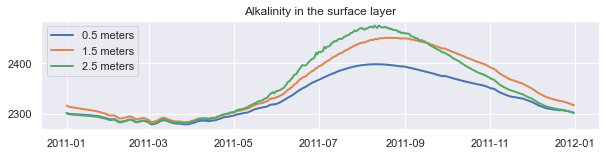

In [2]:
pf.show_alk(results)

**Figure M3-1**. Alkalinity profiles for the three setups with different depths during high tide and different mixing conditions.
Blue line - mixing during 1/3 of a day. Orange line - 1/2 of a day. Green line - a whole day.

Figure M3-1 provides that our simplifications do not underestimate TA generation.
Shallower areas with less extensive mixing between sediments and seawater generate less alkalinity.
Deeper areas generate more alkalinity.
These changes are due to different amount of OM available for degradation.
Deeper areas get more organic matter, so more organic matter is available for denitrification and sulfate reduction reactions.

In [3]:
import src.plot_functions as pf
result = list(map(pf.extract_alk, (('data/validation/d_2p5_om+prod_0p33mix/water.nc', 0.625),
                                   ('data/validation/d_2p5_om+prod_0p5mix/water.nc', 0.625),
                                   ('data/validation/d_2p5_om+prod_mix/water.nc', 0.625))))
results = list(zip(result, ('0.33', '0.5', '1')))

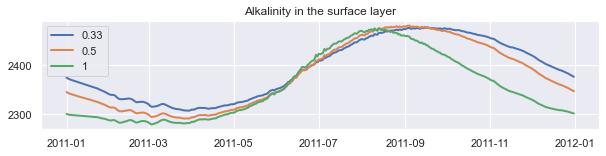

In [4]:
pf.show_alk(results)

**Figure M3-2**. Alkalinity profiles for the three setups with different mixing conditions but the same depth of 2.5 meters.
Blue line - mixing during 1/3 of a day. Orange line - 1/2 of a day. Green line - a whole day.

Figure M3-2 shows different mixing conditions influence on a year TA profile.
One can see that shapes of the curves are various, but the maximum values are approximately similar.